In [2]:
!pip install python-polar-coding

  Using cached python_polar_coding-0.0.1-py3-none-any.whl (59 kB)
  Using cached certifi-2020.6.20-py2.py3-none-any.whl (156 kB)
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
  Using cached anytree-2.8.0-py2.py3-none-any.whl (41 kB)
  Using cached llvmlite-0.33.0-cp38-cp38-win_amd64.whl (15.0 MB)
  Using cached requests-2.24.0-py2.py3-none-any.whl (61 kB)
  Using cached numba-0.50.1-cp38-cp38-win_amd64.whl (2.2 MB)
  Attempting uninstall: idna
    Found existing installation: idna 3.3
    Uninstalling idna-3.3:
      Successfully uninstalled idna-3.3
  Attempting uninstall: certifi
    Found existing installation: certifi 2021.10.8
    Uninstalling certifi-2021.10.8:
      Successfully uninstalled certifi-2021.10.8
  Attempting uninstall: requests
    Found existing installation: requests 2.26.0
    Uninstalling requests-2.26.0:
      Successfully uninstalled requests-2.26.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
cachecontrol 0.12.10 requires msgpack>=0.5.2, which is not installed.


In [14]:
input_string = "EVN"
 
# CONVERT string data to binary string data
binDt = (''.join(format(ord(x), 'b') for x in input_string))
print (binDt)

100010110101101001110


In [47]:
binDt2 = int(binDt[0:4])
binDt2

1000

In [48]:
from python_polar_coding.channels import SimpleBPSKModulationAWGN
from python_polar_coding.polar_codes import FastSSCPolarCodec
from python_polar_coding.simulation.functions import (
    compute_fails,
    generate_binary_message,
)

In [56]:
N = 8
K = 4
design_snr = 2.0
messages = binDt2
# SNR in [.0, .5, ..., 4.5, 5]
#snr_range = [i / 2 for i in range(11)]
snr_range = [0,0,0,1,0,2,3,5]

In [57]:
codec = FastSSCPolarCodec(N=N, K=K, design_snr=design_snr)
bpsk = SimpleBPSKModulationAWGN(fec_rate=K/N)

result_ber = dict()
result_fer = dict()

In [58]:
for snr in snr_range:
    ber = 0
    fer = 0

    for _ in range(messages):
        msg = generate_binary_message(size=K)
        encoded = codec.encode(msg)
        transmitted = bpsk.transmit(message=encoded, snr_db=snr)
        decoded = codec.decode(transmitted)

        bit_errors, frame_error = compute_fails(msg, decoded)
        ber += bit_errors
        fer += frame_error

    result_ber[snr] = ber
    result_fer[snr] = fer

In [59]:
print("For Recived Crossward:\n00001111")

For Recived Crossward:
00001111


In [60]:
result_ber

{0: 321, 1: 222, 2: 107, 3: 45, 5: 17}

In [61]:
result_fer

{0: 155, 1: 111, 2: 53, 3: 24, 5: 7}

In [5]:
!pip install py-polar-codes

In [7]:
import numpy as np
from polarcodes import *

# initialise polar code
myPC = PolarCode(8, 4)
myPC.construction_type = 'bb'
    
# mothercode construction
design_SNR  = 5.0
Construct(myPC, design_SNR)
print(myPC, "\n\n")
    
# set message
my_message = np.random.randint(2, size=myPC.K)
myPC.set_message(my_message)
print("The message is:", my_message)
    
# encode message
Encode(myPC)
print("The coded message is:", myPC.get_codeword())
    
# transmit the codeword
AWGN(myPC, design_SNR)
print("The log-likelihoods are:", myPC.likelihoods)
    
# decode the received codeword
Decode(myPC)
print("The decoded message is:", myPC.message_received)

========== Polar Code ==========
N: 8
M: 8
K: 4
Mothercode Construction: bb
Ordered Bits (least reliable to most reliable): [0 4 2 1 6 5 3 7]
Frozen Bits: [1 2 4 0]
Puncturing Flag: False
Puncturing Parameters: {punct_type: 
                        punct_algorithm: 
                        punct_set: []
                        source_set: []
                        update_frozen_flag: None}
 


The message is: [0 0 0 1]
The coded message is: [1 1 1 1 1 1 1 1]
The log-likelihoods are: [-3.01445507 -5.59461903 -1.7107057  -3.17684171 -3.21348244 -6.50002042
 -0.10824932 -5.80992058]
The decoded message is: [0 0 0 1]


EbNodB: 0
Error bits: 393790
Error probability: 0.078758
EbNodB: 1
Error bits: 281183
Error probability: 0.0562366
EbNodB: 2
Error bits: 187827
Error probability: 0.0375654
EbNodB: 3
Error bits: 114363
Error probability: 0.0228726
EbNodB: 4
Error bits: 62349
Error probability: 0.0124698
EbNodB: 5
Error bits: 29912
Error probability: 0.0059824
EbNodB: 6
Error bits: 11981
Error probability: 0.0023962
EbNodB: 7
Error bits: 3839
Error probability: 0.0007678
EbNodB: 8
Error bits: 956
Error probability: 0.0001912
EbNodB: 9
Error bits: 178
Error probability: 3.56e-05
EbNodB: 10
Error bits: 17
Error probability: 3.4e-06


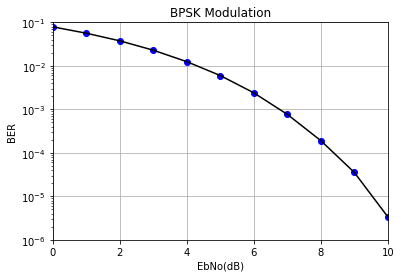

In [64]:
from numpy import sqrt
from numpy.random import rand, randn
import matplotlib.pyplot as plt
  
N = 5000000
EbNodB_range = range(0,11)
itr = len(EbNodB_range)
ber = [None]*itr

for n in range (0, itr): 
 
    EbNodB = EbNodB_range[n]   
    EbNo=10.0**(EbNodB/10.0)
    x = 2 * (rand(N) >= 0.5) - 1
    noise_std = 1/sqrt(2*EbNo)
    y = x + noise_std * randn(N)
    y_d = 2 * (y >= 0) - 1
    errors = (x != y_d).sum()
    ber[n] = 1.0 * errors / N
    
    print("EbNodB:", EbNodB)
    print("Error bits:", errors)
    print("Error probability:", ber[n]) 
        
plt.plot(EbNodB_range, ber, 'bo', EbNodB_range, ber, 'k')
plt.axis([0, 10, 1e-6, 0.1])
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('EbNo(dB)')
plt.ylabel('BER')
plt.grid(True)
plt.title('BPSK Modulation')
plt.show()

In [1]:
"""Signal to noice ratio
Reduce Bit Error Rate"""

'Signal to noice ratio\nReduce Bit Error Rate'